In [1]:
import pymc as pm
import numpy as np

pm.__version__

'4.0.0b4'

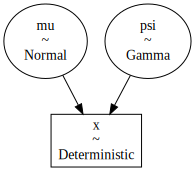

In [2]:
with pm.Model() as model:
    psi = pm.Gamma("psi", 1., 1.)
    mu = pm.Normal("mu", 0., 5.)
    x = pm.ZeroInflatedPoisson("x", psi, mu)

pm.model_to_graphviz(model)

In [3]:
model

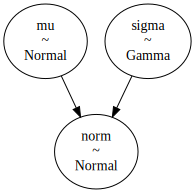

In [4]:
with pm.Model() as norm_model:
    mu = pm.Normal("mu", 0., 5.)
    sigma = pm.Gamma("sigma", 1., 1.)
    norm = pm.Normal("norm", mu, sigma)
    
pm.model_to_graphviz(norm_model)

In [5]:
norm_model

In [6]:
with pm.Model() as mix_model:
    weights = pm.Dirichlet("weights", a=np.tile(1, 3))
    mix_mean = pm.Normal("mix_mean", 0., 3., shape=(3,))
    mix = pm.Mixture("mix", weights, comp_dists=pm.Normal.dist(mu, 1.))

ERROR (aesara.graph.opt): Optimization failure due to: constant_folding
ERROR (aesara.graph.opt): node: Subtensor{int64}(TensorConstant{[]}, ScalarConstant{-1})
ERROR (aesara.graph.opt): TRACEBACK:
ERROR (aesara.graph.opt): Traceback (most recent call last):
  File "/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/graph/opt.py", line 1850, in process_node
    replacements = lopt.transform(fgraph, node)
  File "/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/graph/opt.py", line 1055, in transform
    return self.fn(fgraph, node)
  File "/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/tensor/basic_opt.py", line 2945, in constant_folding
    required = thunk()
  File "/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/aesara/link/c/op.py", line 103, in rval
    thunk()
  File "/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib